# Modelagem de Previsão de Inadimplência
# [EN] Probability of Default Modeling

## Importando Bibliotecas e Dados
## [EN] Importing Libraries and Data

In [ ]:
# Importando biblioteca para trabalhar com Séries
import numpy as np

# Importando biblioteca para lidar com o armazenamento e manipulação dos dados
import pandas as pd

# Importando bibliotecas para modelagem
from sklearn import metrics
from sklearn.metrics import confusion_matrix
# Estas duas bibliotecas juntas, serão usadas para construir um modelo de regressão logística que retorne o p-value
from sklearn import linear_model
import scipy.stats as stat # Colocaremos o p-value como um retorno do modelo

# Importando pickle para salvar o modelo
import pickle

In [ ]:
# Puxando os dados do CSV que está na máquina virtual
loan_data_inputs_train = pd.read_csv('loan_data_inputs_train.csv', index_col = 0)
loan_data_targets_train = pd.read_csv('loan_data_targets_train.csv', index_col = 0)
loan_data_inputs_test = pd.read_csv('loan_data_inputs_test.csv', index_col = 0)
loan_data_targets_test = pd.read_csv('loan_data_targets_test.csv', index_col = 0)

In [ ]:
# Visualizando para ver se os dados estão corretos
loan_data_inputs_train.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
427211,427211,12796369,14818505,24000,24000,24000.0,36 months,8.90,762.08,A,...,0,0,0,1,0,0,0,0,0,0
206088,206088,1439740,1691948,10000,10000,10000.0,36 months,14.33,343.39,C,...,1,0,0,1,0,0,0,0,0,0
136020,136020,5214749,6556909,20425,20425,20425.0,36 months,8.90,648.56,A,...,0,1,0,1,0,0,0,0,0,0
412305,412305,13827698,15890016,17200,17200,17200.0,36 months,16.59,609.73,D,...,1,0,0,1,0,0,0,0,0,0
36159,36159,422455,496525,8400,8400,7450.0,36 months,12.84,282.40,C,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
# Visualizando para ver se os dados estão corretos
loan_data_targets_train.head(5)

,good_bad
427211,1
206088,1
136020,1
412305,0
36159,0


## Selecionando as Variáveis Independentes

## [EN] Selecting the Independent Variables

In [ ]:
# Vamos construir um novo df com as variáveis independentes que usaremos dentro do nosso modelo
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'delinq_2yrs:0',
'delinq_2yrs:1-3',
'delinq_2yrs:>=4',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'open_acc:0',
'open_acc:1-3',
'open_acc:4-12',
'open_acc:13-17',
'open_acc:18-22',
'open_acc:23-25',
'open_acc:26-30',
'open_acc:>=31',
'pub_rec:0-2',
'pub_rec:3-4',
'pub_rec:>=5',
'total_acc:<=27',
'total_acc:28-51',
'total_acc:>=52',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86',
]]

In [ ]:
# Vamos construir também uma lista para manter guardado as variáveis de referência
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'delinq_2yrs:>=4',
'inq_last_6mths:>6',
'open_acc:0',
'pub_rec:0-2',
'total_acc:<=27',
'acc_now_delinq:0',
'total_rev_hi_lim:<=5K',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

## Construindo nosso input

## [EN] Building our input

In [ ]:
# Aqui colocamos que nosso input train é as variáveis independentes colocadas acima, retirando as variáveis de referência
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
427211,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
206088,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
136020,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
412305,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
36159,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0


In [ ]:
# Iremos guardar as colunas do nosso input dentro de uma variável para depois construir um df para análise do modelo
feature_name = inputs_train.columns.values

## Construindo o Modelo de Regressão Logística

## [EN] Building a Logistic Regression Model

Devido ao fato da importação do modelo de regressão logística do sklearn não nos fornecer o *p-value* para avaliarmos as variáveis que dispõe de significância estatística, iremos adaptar o modelo para a construção de um que nos retorne os *p-values* referentes a cada coeficiente obtido

---

[EN] Since the logistic regression model import from sklearn does not provide us with the p-value to assess the variables that have statistical significance, we will adapt the model to build one that returns the p-values corresponding to each coefficient obtained.

In [ ]:
from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:

    def __init__(self,*args,**kwargs):#,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)#,**args)

    def fit(self,X,y):
        self.model.fit(X,y)

        #### Get p-values for the fitted model ####
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X) # Fisher Information Matrix
        Cramer_Rao = np.linalg.inv(F_ij) # Inverse Information Matrix
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates # z-score for eaach model coefficient
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores] # two tailed test for p-values

        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [ ]:
# Vamos criar uma instância da classe de regressão logística com o valor de p
reg = LogisticRegression_with_p_values()

In [ ]:
# Aqui faremos a modelagem para estimar todos os coeficientes e os p-values
reg.fit(inputs_train, loan_data_targets_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Construindo uma tabela sumário para usarmos como referência para ver os coeficientes referentes a cada variável independente
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()

# Incluiremos agora os p-values dentro da tabela para a avaliação de significância estatística
p_values = reg.p_values
p_values = np.append(np.nan, np.array(p_values)) # Adicionamos um valor nulo, para a linha do intercept
summary_table['p_values'] = p_values
summary_table['p_values'] = pd.to_numeric(summary_table['p_values'])

# Visualizando a tabela resultante
summary_table.head()

,Feature name,Coefficients,p_values
0,Intercept,-1.248198,NaN
1,grade:A,1.162017,1.003972e-37
2,grade:B,0.896327,1.469296e-48
3,grade:C,0.697865,9.400532e-35
4,grade:D,0.505830,6.205429e-21


Vamos buscar agora aqueles valores que não tem uma significância estatística, em outros termos, serão aqueles valores menores que 0,05

---

[EN] Let's now search for those values that do not have statistical significance, in other words, those values that are less than 0.05.

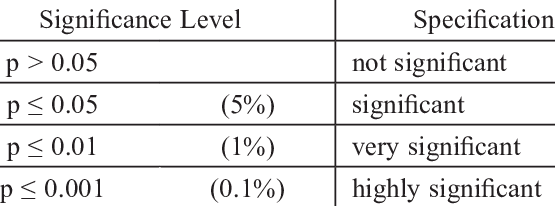

No caso do conjunto de variáveis, iremos refazer o modelo apenas com aquele grupo de variáveis que apresenta a sua maioria com significância estatística

---

[EN] In the case of the variable set, we will remake the model only with that group of variables that mostly present statistical significance.

In [ ]:
# Observando apenas aqueles coeficientes que não são estatisticamente significantes
notsignificant_coef = summary_table.loc[summary_table['p_values'] >= 0.05, :]
notsignificant_coef

,Feature name,Coefficients,p_values
9,addr_state:NM_VA,0.034645,0.280283
23,verification_status:Source Verified,-0.011069,0.411366
47,mths_since_earliest_cr_line:165-247,0.036468,0.073661
51,delinq_2yrs:0,0.061626,0.281875
52,delinq_2yrs:1-3,0.021727,0.686836
56,open_acc:1-3,-0.009558,0.954208
57,open_acc:4-12,-0.101002,0.534814
58,open_acc:13-17,-0.127730,0.433397
59,open_acc:18-22,-0.140685,0.391092
60,open_acc:23-25,-0.146425,0.385252


In [ ]:
 # Incluindo o nome da categoria para podermos contar quantas variáveis tem por categoria
summary_table['category'] = summary_table['Feature name'].apply(lambda x: x.split(':')[0])

# Contando quantas variáveis tem por categoria
count_per_category = summary_table.groupby('category').size()
print(count_per_category)

category
Intercept                       1
acc_now_delinq                  1
addr_state                     13
annual_inc                     11
delinq_2yrs                     2
dti                             9
emp_length                      5
grade                           6
home_ownership                  2
initial_list_status             1
inq_last_6mths                  3
int_rate                        4
mths_since_earliest_cr_line     5
mths_since_issue_d              7
mths_since_last_delinq          4
mths_since_last_record          6
open_acc                        7
pub_rec                         2
purpose                         4
term                            1
total_acc                       2
total_rev_hi_lim                7
verification_status             2
dtype: int64


Com isso, podemos ver que as seguintes categoria serão excluídas do treino do modelo devido a não significância estatística:

* delinq_2yrs
* open_acc
* pub_rec
* total_acc
* total_rev_hi_lim

---

[EN] With this, we can see that the following categories will be excluded from the model training due to lack of statistical significance:

* delinq_2yrs
* open_acc
* pub_rec
* total_acc
* total_rev_hi_lim


In [ ]:
# Excluindo a coluna category de summary_table
summary_table.drop(['category'], axis = 1)
summary_table.head()

,Feature name,Coefficients,p_values,category
0,Intercept,-1.248198,NaN,Intercept
1,grade:A,1.162017,1.003972e-37,grade
2,grade:B,0.896327,1.469296e-48,grade
3,grade:C,0.697865,9.400532e-35,grade
4,grade:D,0.505830,6.205429e-21,grade


### Modelando com apenas as variáveis estatisticamente significantes

### [EN] Modeling with only the statistically significant variables.

In [ ]:
# Variáveis independentes estatisticamente significantes
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86',
]]

In [ ]:
# Variáveis de referência por categoria que são estatisticamente significantes
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [ ]:
# Aqui colocamos que nosso input train é as variáveis independentes colocadas acima, retirando as variáveis de referência
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
427211,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
206088,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
136020,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
412305,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
36159,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0


In [ ]:
# Rodando o novo modelo
new_reg = LogisticRegression_with_p_values()
new_reg.fit(inputs_train, loan_data_targets_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Analogamente ao caso anterior
feature_name = inputs_train.columns.values

# Construindo uma tabela sumário para usarmos como referência para ver os coeficientes referentes a cada variável independente
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(new_reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', new_reg.intercept_[0]]
summary_table = summary_table.sort_index()

# Incluiremos agora os p-values dentro da tabela para a avaliação de significância estatística
p_values = new_reg.p_values
p_values = np.append(np.nan, np.array(p_values)) # Adicionamos um valor nulo, para a linha do intercept
summary_table['p_values'] = p_values
summary_table['p_values'] = pd.to_numeric(summary_table['p_values'])

# Visualizando a tabela resultante
summary_table.head()

,Feature name,Coefficients,p_values
0,Intercept,-1.404278,NaN
1,grade:A,1.144287,1.287245e-36
2,grade:B,0.885590,8.431029e-48
3,grade:C,0.689908,2.142216e-34
4,grade:D,0.501038,6.364543e-21


## Exportando o Modelo

## [EN] Exporting PD Model

In [ ]:
# Vamos exportar nosso modelo construído na extensão 'SAV' como 'pd_model.sav'
pickle.dump(new_reg, open('pd_model.sav', 'wb'))

# Validação de Previsão de Inadimplência
# [EN] Probability of Default Validation

## Gerando os outputs dos nossos dados de teste

## [EN] Generating the outputs of our test data

In [ ]:
# Manteremos as mesmas variáveis que o conjunto de treino para o modelo final
inputs_test_with_ref_cat = loan_data_inputs_test.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86',
]]

In [ ]:
# E as mesmas variáveis de referência
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [ ]:
inputs_test = inputs_test_with_ref_cat.drop(ref_categories, axis = 1)
inputs_test.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
288564,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
213591,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
263083,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
165001,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0


In [ ]:
# Calculando os resultado obtidos pelo modelo final a partir do nosso conjunto de teste
y_hat_test = new_reg.model.predict(inputs_test)

In [ ]:
# Aqui calculamos a probabilidade de ser cada um dos valores
# É interessante para vermos não só a decisão 0/1, mas a probabilidade de ser avaliado como bom ou ruim
y_hat_test_proba = new_reg.model.predict_proba(inputs_test)
y_hat_test_proba = y_hat_test_proba[: ][: , 1] # Queremos apenas a probabilidade de ser um bom empréstimo que está disposta no indice 1

In [ ]:
# Aqui juntaremos em um único dataframe a saída original dos dados de target test e as probabilidades obtidas com o modelo
loan_data_targets_test_temp = loan_data_targets_test
loan_data_targets_test_temp.reset_index(drop = True, inplace = True)
df_actual_predicted_probs = pd.concat([loan_data_targets_test_temp, pd.DataFrame(y_hat_test_proba)], axis = 1)
df_actual_predicted_probs.columns = ['loan_data_targets_test', 'y_hat_test_proba']
df_actual_predicted_probs.index = loan_data_inputs_test.index

df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba
362514,1,0.924300
288564,1,0.849266
213591,1,0.885177
263083,1,0.940628
165001,1,0.968674


## Calculando a Matriz de Confusão

## [EN] Calculating the Confusion Matrix

<img src="https://images.datacamp.com/image/upload/v1701364260/image_5baaeac4c0.png" alt="confusion_matrix" width="400"/>

In [ ]:
# A matriz de confusão nos dará os casos verdadeiros e os falsos
cm = confusion_matrix(loan_data_targets_test, y_hat_test)
print("Matriz de Confusão:")
print(cm)

# Calculando a acurácia do modelo
acc = (cm[0][0] + cm[1][1])/cm.sum()
print("\nAcurácia:")
print(acc)

# Acurácia em porcentagem
acc_percentage = round(acc*100,2)
print("\nAcurácia em Porcentagem:")
print(f'{acc_percentage}%')

Matriz de Confusão:
[[    6 10184]
 [    6 83061]]

Acurácia:
0.8907320630086749

Acurácia em Porcentagem:
89.07%


Em outras palavras, temos que nosso modelo avaliou os casos de teste com uma precisão de 89,07% isso tem que ser avaliado de acordo com a necessidade do banco e o quão dispostos ao risco estes estão, pois por um lado ele teve uma boa precisão, porém por outro lado ele considerou 10184 empréstimos que houveram inadimplência com empréstimos bons que não haveria inadimplência

---

[EN] In other words, our model evaluated the test cases with an accuracy of 89.07%. This needs to be evaluated according to the bank's needs and how risk-averse they are, as on one hand, it had good accuracy, but on the other hand, it considered 10,184 defaulted loans as good loans with no default

### Continuação do Projeto

Como continuidade do projeto, poderíamos seguir avaliando outros parâmetros de corte da nossa regressão logística, para isso usaríamos o código disposto abaixo para mudar o parâmetro e reavaliar os resultados

---

### [EN] Future of Project

As a continuation of the project, we could proceed by evaluating other cutoff parameters of our logistic regression. For this, we would use the code provided below to change the parameter and reevaluate the results.